Dataset= News Headlines Dataset For Sarcasm Detection

In [6]:
import json
import pandas as pd

#### Ways to load the json DataSet

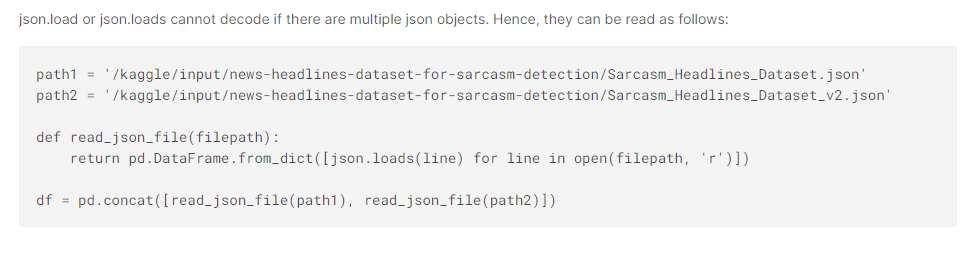

In [7]:
path1 = 'Sarcasm_Headlines_Dataset.json'
path2 = 'Sarcasm_Headlines_Dataset_v2.json'

def read_json_file(filepath):
    return pd.DataFrame.from_dict([json.loads(line) for line in open(filepath, 'r')])

df = pd.concat([read_json_file(path1), read_json_file(path2)])

In [28]:
Dataset1=pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)
Dataset2=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
Data=pd.concat([Dataset1,Dataset2], axis=0, join='outer')

**Failed Syntax**<br>
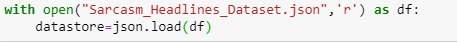


In [70]:
Dataset1

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


## Tokenizing the sentences

In [74]:
data=Dataset1

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
tokenizer=Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(data["headline"])
words_index=tokenizer.word_index

In [77]:
print("length of the vocab: "+ str(len(words_index)))
print("some of the words:")
#[words_index[keys] for keys in words_index.keys()] ### didn't work

length of the vocab: 30885
some of the words:


In [78]:
sentences=tokenizer.texts_to_sequences(data["headline"])

**Adding padding to the sentences to make them of similar lengths**

In [79]:
padded=pad_sequences(sentences,padding='post') #Padding["post"] added to the end

In [80]:
data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [86]:
print("ACTUAL SENTENCE IN ENGLISH: "+ str(data["headline"][0]))
print("without padding: "+str(sentences[0]))
print("with padding: "+str(padded[0]))
print("shape of the matrix of the sentences: "+ str(padded.shape))

ACTUAL SENTENCE IN ENGLISH: thirtysomething scientists unveil doomsday clock of hair loss
without padding: [16004, 355, 3167, 7474, 2644, 3, 661, 1119]
with padding: [16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0 